### coding assignment

In [125]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [132]:
uvinitial = numpy.load('./data/uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']
n = 192
Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1
dh = 5./(n-1)
T = 8000
dt = .9 * dh**2 / (4*max(Du,Dv))
nt = int(T/dt)

In [133]:
def f_n(du,dv,F,k,dt,nt,dh):
    for n in range(nt):
        Un = U.copy()
        
        Vn = V.copy()

        
        U[1:-1,1:-1] = Un[1:-1,1:-1] +\
        Du*dt/(dh**2) * (Un[2:,1:-1] - 2*Un[1:-1,1:-1] + Un[:-2,1:-1]+\
        Un[1:-1,2:] - 2*Un[1:-1,1:-1] + Un[1:-1,:-2])-\
        dt*Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2 + dt*F*(1-Un[1:-1,1:-1])
            
        V[1:-1,1:-1] = Vn[1:-1,1:-1] +\
        Dv*dt/(dh**2) * (Vn[2:,1:-1] - 2*Vn[1:-1,1:-1] + Vn[:-2,1:-1] +\
        Vn[1:-1,2:] - 2*Vn[1:-1,1:-1] + Vn[1:-1,:-2]) +\
        dt*Un[1:-1,1:-1]*Vn[1:-1,1:-1]**2 - dt*(F+k)*Vn[1:-1,1:-1]
        U[-1,:] = U[-2,:]
        U[:,-1] = U[:,-2]
        U[0,:] =U[1,:]
        U[:,0] =U[:,1]
        V[-1,:] = V[-2,:]
        V[:,-1] = V[:,-2]
        V[0,:] =V[1,:]
        V[:,0] =V[:,1]
    return U
    return V


In [134]:

f_n(Du, Dv, F, k,dt,nt,dh)
m=U[100,::40]
print('the first number is :','%.4f'%m[0])
print('the second number is :','%.4f'%m[1])
print('the third number is :','%.4f'%m[2])
print('the fourth number is :','%.4f'%m[3])
print('the fifth number is :','%.4f'%m[4])

the first number is : 0.9247
the second number is : 0.8501
the third number is : 0.6682
the fourth number is : 0.9020
the fifth number is : 0.9040


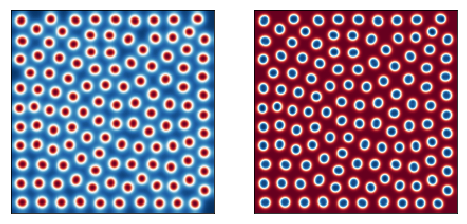

In [135]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);